## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [ ]:
import pandas as pd
df = pd.read_csv('/content/ha_1.csv')
df.head()
df.dropna()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [ ]:
# fit a logistic regression using only age and chol as predictors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train = df[['age', 'chol']]
y_train = df['diagnosis']

model = LogisticRegression()
model.fit(X_train, y_train)

intercept = model.intercept_
print(intercept)
age_coef = model.coef_[0][0]
chol_coef = model.coef_[0][1]
print(age_coef)
print(chol_coef)

coef_df = pd.DataFrame(model.coef_, columns=X_train.columns)
coef_df

chol_disease_logreg = (0 - intercept - (age_coef * 55)) / chol_coef
print(chol_disease_logreg)



[-3.24011226]
0.04686330613037214
0.0018012385190290258
[367.8748898]


In [ ]:
#How high for the doctors to estimate a 90% chance that heart disease is present?
log_odds = log(0.9 / (1 - 0.9))
print(log_odds)
level = (log_odds - intercept - (age_coef * 55)) / chol_coef
print(level)

2.1972245773362196
[1587.71587928]


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
X_train = df[['age', 'chol']]
y_train = df['diagnosis']

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

intercept = model.intercept_
print(intercept)
age_coef = model.coef_[0][0]
chol_coef = model.coef_[0][1]
print(age_coef)
print(chol_coef)

coef_df = pd.DataFrame(model.coef_, columns=X_train.columns)
coef_df

chol_disease_lda = (0 - intercept - (age_coef * 55)) / chol_coef
print(chol_disease_lda)

[-3.21967766]
0.04655743553694484
0.0017896671039291314
[368.23535753]


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
# Fit an SVC model using only age and chol as predictors. Don't forget to tune the regularization parameter.
# For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
X_train = df[['age', 'chol']]
y_train = df['diagnosis']

model = SVC(C=1, kernel='linear')
model.fit(X_train, y_train)

svc_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(model, svc_params, cv=5, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)

print(grid.best_params_)

best_model = grid.best_estimator_
intercept = best_model.intercept_
print(intercept)
age_coef = best_model.coef_[0][0]
chol_coef = best_model.coef_[0][1]
print(age_coef)
print(chol_coef)

coef_df = pd.DataFrame(best_model.coef_, columns=X_train.columns)
coef_df

chol_disease_svc = (0 - intercept - (age_coef * 55)) / chol_coef
print(chol_disease_svc)


{'C': 0.1}
[-4.68655043]
0.06439804276269001
0.003660674368546779
[312.69049431]


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Prepare data (assuming X_train and y_train are already defined from previous cells)
# X_train = df[['age', 'chol']]
# y_train = df['diagnosis']

# 1. Logistic Regression Parameters
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_intercept = lr_model.intercept_[0]
lr_age_coef = lr_model.coef_[0][0]
lr_chol_coef = lr_model.coef_[0][1]

print(f"Logistic Regression Intercept: {lr_intercept}")
print(f"Logistic Regression Age Coefficient: {lr_age_coef}")
print(f"Logistic Regression Cholesterol Coefficient: {lr_chol_coef}\n")

# 2. LDA Parameters
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_intercept = lda_model.intercept_[0]
lda_age_coef = lda_model.coef_[0][0]
lda_chol_coef = lda_model.coef_[0][1]

print(f"LDA Intercept: {lda_intercept}")
print(f"LDA Age Coefficient: {lda_age_coef}")
print(f"LDA Cholesterol Coefficient: {lda_chol_coef}\n")

# 3. SVC Parameters (with GridSearchCV to find best C)
svc_model_base = SVC(kernel='linear')
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_svc = GridSearchCV(svc_model_base, svc_params, cv=5, scoring = 'accuracy', n_jobs = -1)
grid_svc.fit(X_train, y_train)
best_svc_model = grid_svc.best_estimator_

svc_intercept = best_svc_model.intercept_[0]
svc_age_coef = best_svc_model.coef_[0][0]
svc_chol_coef = best_svc_model.coef_[0][1]

print(f"SVC Intercept: {svc_intercept}")
print(f"SVC Age Coefficient: {svc_age_coef}")
print(f"SVC Cholesterol Coefficient: {svc_chol_coef}")

Logistic Regression Intercept: -3.240112258859206
Logistic Regression Age Coefficient: 0.04686330613037214
Logistic Regression Cholesterol Coefficient: 0.0018012385190290258

LDA Intercept: -3.2196776604068784
LDA Age Coefficient: 0.04655743553694484
LDA Cholesterol Coefficient: 0.0017896671039291314

SVC Intercept: -4.686550429743357
SVC Age Coefficient: 0.06439804276269001
SVC Cholesterol Coefficient: 0.003660674368546779


In [ ]:
age_min = df['age'].min()
age_max = df['age'].max()
age_range = np.linspace(age_min, age_max, 100)

# Logistic Regression decision boundary
lr_chol_boundary = (-lr_intercept - lr_age_coef * age_range) / lr_chol_coef

# LDA decision boundary
lda_chol_boundary = (-lda_intercept - lda_age_coef * age_range) / lda_chol_coef

# SVC decision boundary
svc_chol_boundary = (-svc_intercept - svc_age_coef * age_range) / svc_chol_coef

print("Calculated decision boundaries for Logistic Regression, LDA, and SVC.")

NameError: name 'np' is not defined

In [ ]:
import numpy as np

age_min = df['age'].min()
age_max = df['age'].max()
age_range = np.linspace(age_min, age_max, 100)

# Logistic Regression decision boundary
lr_chol_boundary = (-lr_intercept - lr_age_coef * age_range) / lr_chol_coef

# LDA decision boundary
lda_chol_boundary = (-lda_intercept - lda_age_coef * age_range) / lda_chol_coef

# SVC decision boundary
svc_chol_boundary = (-svc_intercept - svc_age_coef * age_range) / svc_chol_coef

print("Calculated decision boundaries for Logistic Regression, LDA, and SVC.")

Calculated decision boundaries for Logistic Regression, LDA, and SVC.


In [ ]:
plt.figure(figsize=(10, 7))

# Scatter plot of age vs. chol, colored by diagnosis
sns.scatterplot(data=df, x='age', y='chol', hue='diagnosis', alpha=0.7, s=50)

# Plot Logistic Regression decision boundary
plt.plot(age_range, lr_chol_boundary, color='red', linestyle='-', label='Logistic Regression Boundary')

# Plot LDA decision boundary
plt.plot(age_range, lda_chol_boundary, color='green', linestyle='--', label='LDA Boundary')

# Plot SVC decision boundary
plt.plot(age_range, svc_chol_boundary, color='purple', linestyle=':', label='SVC Boundary')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Decision Boundaries for Logistic Regression, LDA, and SVC')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

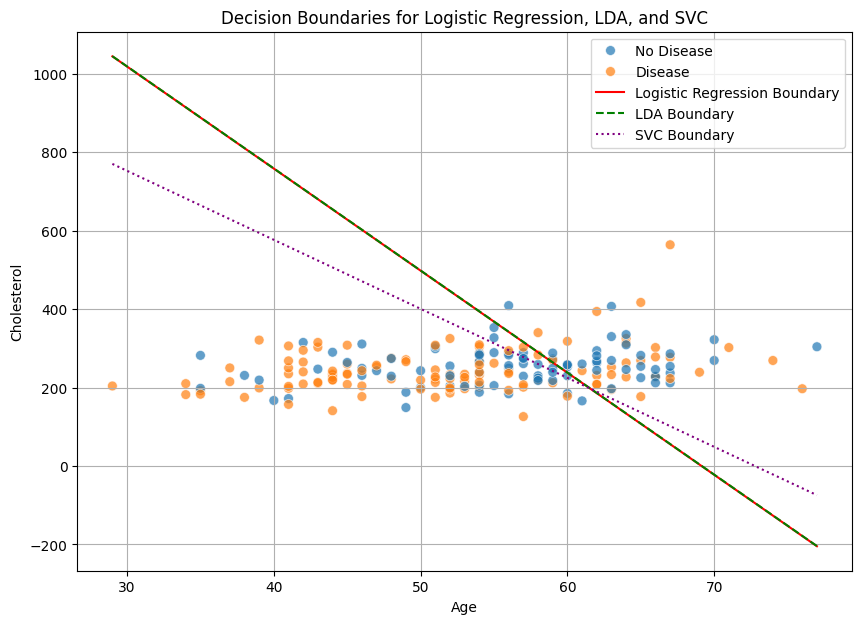

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

# Scatter plot of age vs. chol, colored by diagnosis
sns.scatterplot(data=df, x='age', y='chol', hue='diagnosis', alpha=0.7, s=50)

# Plot Logistic Regression decision boundary
plt.plot(age_range, lr_chol_boundary, color='red', linestyle='-', label='Logistic Regression Boundary')

# Plot LDA decision boundary
plt.plot(age_range, lda_chol_boundary, color='green', linestyle='--', label='LDA Boundary')

# Plot SVC decision boundary
plt.plot(age_range, svc_chol_boundary, color='purple', linestyle=':', label='SVC Boundary')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Decision Boundaries for Logistic Regression, LDA, and SVC')
plt.legend()
plt.grid(True)
plt.show()